# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [68]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [69]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [70]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/abdarabdar/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


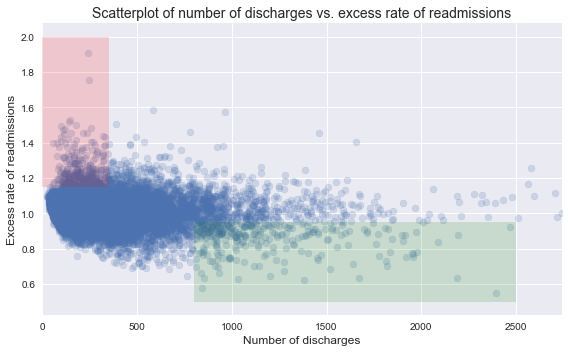

In [71]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

The summary of the analysis states that the rate of readmissions is trending down with increasing number of discharges, using the scatterplot as a proof. The scatterplot shows that there's no strong correlation between the excess rate of readmissions and number of discharges, and if there is a correlation, the correlation coefficient is likely small. Hence, it's not obvious from the scatterplot if the rate of readmission is really trending down. 

There seems to be a greater incidence of excess rate of readmissions with lower number of discharges, though the magnitude of this increase is not obvious, and it's not clear if this increase is statistically significant. The statement about the green area on the chart is clearly erroneus--there is a greater incidence of lower rates of readmissions with lower number of discharges and not higher, as stated above.

The statements in section B are not supported by any additional evidence, and it's very hard to evaluate the exact values of excess readmission just by looking at the scatterplot. The conclusions state that there is a significant correlation between hospital capacity (number of discharges) and readmission rates, which is not proved by any additional analysis. With the correlation coefficient for the two variables being obviously low, this conclusion rasies doubts. Also, the second statement in section C is not supported by any data and, as a result, speculative. Hence, there's no sufficient base for the conclusion drawn in section D, as, even if the further statistical analysis shows the negative correlation between the number of discharges and excess rate of readmissions, there's still no data/analysis to support the conclusion about the upgraded resource allocation. As a result, the second conclusion in section D is also baseless--there's no demonstrated proof of impact of the increased hospital capacity on decreasing the excess rate of readmissions.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis

To evaluate the potential correlation of the number of discharges with the excess rate of readmissions, a correlation coefficient needs to be calculated. A correlation coefficient itself is not sufficient to prove that there's a significant correlation between two variables. The correlation coefficient for this study should be compared to the correlation coefficients for other, independently done studies. As a rule of thumb, a comparison to at least 30 correlation coefficients from other studies should be enough to evaluate the statistical significance for the current study.

Another way to test the statistical significance of the current data is to generate multiple permuted samples and calculate the correlation coefficient for each of them. This is the approach we're going to use. We will start with calculating the correlation coefficient for the current study, but first we will check if the data are completely cleaned:

In [72]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


As we see above, there are some values in the dataset. Since for the purpose of this evaluation we need only two variables, let's clean them and save separately:

In [73]:
#Cleaning the data
clean_hospital_read_df = clean_hospital_read_df.loc[:,['Excess Readmission Ratio', 'Number of Discharges']]
clean_hospital_read_df = clean_hospital_read_df.dropna(axis=0, how='any')

#clean_hospital_read_df['Excess Readmission Ratio'] = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] != np.nan]
#clean_hospital_read_df['Number of Discharges'] = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] != np.nan]
clean_hospital_read_df.info()
clean_hospital_read_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Excess Readmission Ratio    11497 non-null float64
Number of Discharges        11497 non-null int64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


,Excess Readmission Ratio,Number of Discharges
1832,1.0914,25
1699,1.0961,27
1774,1.0934,28
1853,1.0908,29
1290,1.1123,30


We have the same number of rows for each of the variables of our interest. Let's save them separately and compute the correlation coefficient:

In [74]:
#Saving separate variables
readm_ratio = clean_hospital_read_df['Excess Readmission Ratio']
discharges = clean_hospital_read_df['Number of Discharges'] 

#Calculating the correlation coefficient
r = np.corrcoef(readm_ratio, discharges)[0,1]
r

-0.097397943510793533

As expected, there is a small negative correlation between the variables. Let's generate permuted samples and calculate correlation coefficients for them:

In [75]:
#Defining the permutation function
def perm_sample(data):

    #Doing the permutation
    perm_data = np.random.permutation(data)

    return perm_data

#Defining a function to generate permuted correlation coefficients
def calculate_perm_corr(data1, data2, size=1):

    #Empty array
    perm_replicates = np.empty(size)

    for i in range(size):
        #Generating permutation samples
        perm_readm_ratio = perm_sample(data1)
        perm_discharges =  perm_sample(data2)

        #Calculating the desired function
        perm_replicates[i] = np.corrcoef(perm_readm_ratio, perm_discharges)[0,1]

    return perm_replicates

#Calculating the coefficients
permuted_corr_coef = calculate_perm_corr(readm_ratio, discharges, size=10000)

The null-hypothesis for our 99.9% statistical significance test ($\alpha$ = .01) will be that there's no correlation between the number of discharges and readmission rates, and that the small negative correlation that we saw above is just a random fluctuation, which is possible to observe in 99.9% of the cases if the true population mean is in fact zero. Let's see where our observed correlation coefficient lies in the distribution of correlation coefficients obtained from the permuted data:

In [76]:
#Calculating the p-value
p = np.sum(permuted_corr_coef <= r) / len(permuted_corr_coef)
p

0.0

The p-value is practically zero, so we reject the null-hypothesis and conclude that there's a statistically significant negative correlation between the number of discharges and readmission rates. Statistical significance, however, does not imply practical significance--the correlation coefficient for our study is very small, even if statistically significant. Based on such small negative correlation, it doesn't seem reasonable to recommend any regulatory policy changes. Instead, more studies need to be done. A quick analysis of the correlations within the dataset shows that there are no variables with high correlation to the excess readmition ratio, so the new studies should consider investigating additional variables.

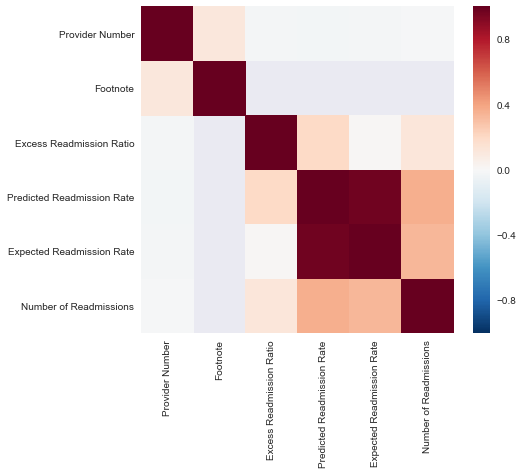

In [77]:
#Importing the package and building the correlation matrix
import seaborn as sns
correlations = hospital_read_df.corr()
# Make the figsize 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations)

The main advantage of the initially used scatterplot format is that it allows to quickly spot potential correlation in cases when it's clearly pronounced (i.e. the correlation coefficient is sufficiently large). The main disadvantage is that this format is not useful in case of small correlation coefficients--it's very hard to evaluate the magnitude of correlation in such cases. Also, the scatterplot format makes it practically impossible to confirm/reject the statistics listed in section B.

To illustrate the correlation between the variables better, a scatterplot with a linear regression line should be used. To illustrate the statistics from section B, each of the points in that section should be illustrated with a histogram. 

Let's create the improved charts:

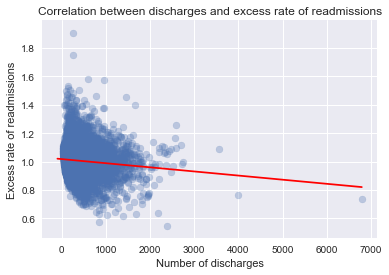

In [78]:
#Plotting the scatterplot
plt.scatter(discharges, readm_ratio, alpha=0.3)

#Fitting a linear regression
slope, intercept = np.polyfit(discharges, readm_ratio, 1)

#Setting the parameters of the regression line (slope equals correlation coefficient)
x = np.array([-100, max(discharges)])
y = slope * x + intercept

plt.plot(x, y, color='red')

plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Correlation between discharges and excess rate of readmissions')

plt.show()

Here's a histogram for the following bullet point. On the plot below, the 25th and 75th percentiles are marked with gray dashed lines, the median is marked with the green line, and the mean with red line. 

- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

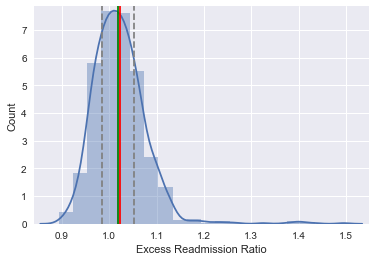

In [79]:
#Histogram of hospitals with less than 100 discharges
df_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100] 
df_100 = df_100['Excess Readmission Ratio']

sns.distplot(df_100, bins = 20)
_ = plt.axvline(x=np.mean(df_100), color = 'red')
_ = plt.axvline(x=np.percentile(df_100, 25), linestyle='dashed', color = 'grey')
_ = plt.axvline(x=np.percentile(df_100, 75), linestyle='dashed', color = 'grey')
_ = plt.axvline(x=np.median(df_100), color = 'green')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Count')
plt.margins(0.02)
plt.show()

And here's the final histogram for the last bullet point. On the plot below, the 25th and 75th percentiles are marked with gray dashed lines, the median is marked with the green line, and the mean with red line. 

- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

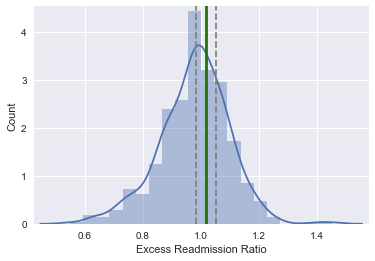

In [80]:
#Histogram of hospitals with more than 1000 discharges
df_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000] 
df_1000 = df_1000['Excess Readmission Ratio']

sns.distplot(df_1000, bins = 20)
_ = plt.axvline(x=np.mean(df_100), color = 'red')
_ = plt.axvline(x=np.percentile(df_100, 25), linestyle='dashed', color = 'grey')
_ = plt.axvline(x=np.percentile(df_100, 75), linestyle='dashed', color = 'grey')
_ = plt.axvline(x=np.median(df_100), color = 'green')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('Count')
plt.margins(0.02)
plt.show()

The initial analysis stated that 44% of hospitals had excess readmission rate greater than 1, which the above chart proves to be incorrect. As visible on the chart, slightly more than 50% of hospitals have an excess readmission rate greater than 1.